In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [46]:
# Read the CSV and Perform Basic Data Cleaning
df = pd.read_csv("test_Data.csv")

df.head()

,abv,ibu,id,name,style,brewery_id,ounces
0,0.056,4,1350,Summer Solstice,Cream Ale,171,12.0
1,0.056,4,753,Summer Solstice Cerveza Crema (2009),Cream Ale,171,12.0
2,0.056,4,77,Summer Solstice (2011),Cream Ale,171,12.0
3,0.092,5,704,Devils Tramping Ground Tripel,Tripel,360,12.0
4,0.044,5,2520,Yo Soy Un Berliner,Berliner Weissbier,66,12.0


In [47]:
df = df.drop(columns=["name", "style", "brewery_id", "ounces"])
df.head()

,abv,ibu,id
0,0.056,4,1350
1,0.056,4,753
2,0.056,4,77
3,0.092,5,704
4,0.044,5,2520


In [48]:
# Create a Train Test Split
X = df[["abv", "id"]]
y = df["ibu"].values.reshape(-1, 1)
print(X.shape, y.shape)

(1405, 2) (1405, 1)


In [49]:
# Split the data using train_test_split
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,abv,id
10,0.034,1417
147,0.048,466
1206,0.078,395
282,0.039,2399
298,0.048,2583


In [50]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [51]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.4458378032339943
Testing Score: 0.462086940846963


Text(0.5, 1.0, 'Residual Plot')

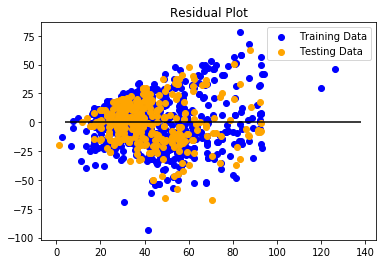

In [52]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [53]:
# activity 3-5
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from tensorflow.keras.utils import to_categorical

X_scaler = MinMaxScaler().fit(X_train)
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [54]:
# activity 2-8
# Support vector machine linear classifier
from sklearn.svm import SVC 
model2 = SVC(kernel='linear', max_iter=1000)
model2.fit(X_train_scaled, y_train)
predictions = model2.predict(X_test)

C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
print(f"Training Data Score: {model2.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model2.score(X_test_scaled, y_test)}")

Training Data Score: 0.07597340930674264
Testing Data Score: 0.05113636363636364


In [56]:
# activity 2-9 / 2-10
# Create the GridSearchCV model
# Create the GridSearch estimator along with a parameter object containing the values to adjust
# Try adjusting `C` with values of 1, 5, and 10. Adjust `gamma` using .0001, 0.001, and 0.01
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [1, 5, 10],
              'gamma': [0.0001, 0.001, 0.01]}
grid = GridSearchCV(model2, param_grid, verbose=3)

In [57]:
# Train the model with GridSearch

# Fit the model using the grid search estimator. 
# This will take the SVC model and try each combination of parameters
# YOUR CODE HERE
grid.fit(X_train, y_train)

C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\model_selection\_split.py:657: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=3.
  % (min_groups, self.n_splits)), Warning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] C=1, gamma=0.0001 ...............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s remaining:    0.0s
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1, gamma=0.0001, score=0.018, total=   0.8s
[CV] C=1, gamma=0.0001 ...............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1, gamma=0.0001, score=0.000, total=   1.0s
[CV] C=1, gamma=0.0001 ...............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=1, gamma=0.0001, score=0.016, total=   1.0s
[CV] C=1, gamma=0.001 ................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1, gamma=0.001, score=0.018, total=   0.9s
[CV] C=1, gamma=0.001 ................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1, gamma=0.001, score=0.000, total=   1.0s
[CV] C=1, gamma=0.001 ................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=1, gamma=0.001, score=0.016, total=   1.1s
[CV] C=1, gamma=0.01 .................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.01, score=0.018, total=   0.9s
[CV] C=1, gamma=0.01 .................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.01, score=0.000, total=   1.1s
[CV] C=1, gamma=0.01 .................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=1, gamma=0.01, score=0.016, total=   1.1s
[CV] C=5, gamma=0.0001 ...............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=5, gamma=0.0001, score=0.021, total=   0.9s
[CV] C=5, gamma=0.0001 ...............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=5, gamma=0.0001, score=0.003, total=   1.1s
[CV] C=5, gamma=0.0001 ...............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=5, gamma=0.0001, score=0.016, total=   1.1s
[CV] C=5, gamma=0.001 ................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=5, gamma=0.001, score=0.021, total=   0.9s
[CV] C=5, gamma=0.001 ................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=5, gamma=0.001, score=0.003, total=   1.1s
[CV] C=5, gamma=0.001 ................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=5, gamma=0.001, score=0.016, total=   1.1s
[CV] C=5, gamma=0.01 .................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=5, gamma=0.01, score=0.021, total=   0.9s
[CV] C=5, gamma=0.01 .................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=5, gamma=0.01, score=0.003, total=   1.0s
[CV] C=5, gamma=0.01 .................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ..................... C=5, gamma=0.01, score=0.016, total=   1.1s
[CV] C=10, gamma=0.0001 ..............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10, gamma=0.0001, score=0.018, total=   0.9s
[CV] C=10, gamma=0.0001 ..............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10, gamma=0.0001, score=0.003, total=   1.1s
[CV] C=10, gamma=0.0001 ..............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................. C=10, gamma=0.0001, score=0.016, total=   1.1s
[CV] C=10, gamma=0.001 ...............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.001, score=0.018, total=   0.9s
[CV] C=10, gamma=0.001 ...............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.001, score=0.003, total=   1.1s
[CV] C=10, gamma=0.001 ...............................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] ................... C=10, gamma=0.001, score=0.016, total=   1.1s
[CV] C=10, gamma=0.01 ................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.01, score=0.018, total=   0.9s
[CV] C=10, gamma=0.01 ................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.01, score=0.003, total=   1.1s
[CV] C=10, gamma=0.01 ................................................


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  27 out of  27 | elapsed:   27.2s finished
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV] .................... C=10, gamma=0.01, score=0.016, total=   1.1s


C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\svm\base.py:241: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  % self.max_iter, ConvergenceWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=1000, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [1, 5, 10], 'gamma': [0.0001, 0.001, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [58]:
# List the best parameters for this dataset
print(grid.best_params_)

{'C': 5, 'gamma': 0.0001}


In [59]:
# List the best score
print(grid.best_score_)

0.013295346628679962


In [60]:
# Make predictions with the hypertuned model
predictions = grid.predict(X_test)

In [61]:
# Calculate classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions,
                            target_names=["1", "2","3","4","5","6","7","8","9","10","11",
                                          "12","13","14","15","16","17","18","19","20","21",
                                         "22", "23","24","25","26","27","28","29","30","31","32",
                                          "33","34","35","36","37","38","39","40","41","42",
                                         "43", "44","45","46","47","48","49","50","51","52","53",
                                          "54","55","56","57","58","59","60","61","62","63",
                                          "64","65","66","67","68","69","70","71","72","73",
                                         "74", "75","76","77","78","79","80"]))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         4
           5       0.00      0.00      0.00         7
           6       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         7
          10       0.03      0.25      0.06         4
          11       0.00      0.00      0.00         7
          12       0.00      0.00      0.00        15
          13       0.00      0.00      0.00         2
          14       0.00      0.00      0.00        18
          15       0.00      0.00      0.00         9
          16       0.00      0.00      0.00         9
          17       0.00      0.00      0.00         5
          18       0.00    

C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\lonny\anacond\Anaconda3\envs\PandasData\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [62]:
# df = pd.read_csv("data2.csv")
df=pd.read_csv('output_df.csv')
df.head()

,id,name,ibu,ibu_category,ibu_category_nbr,srm,srm_category,srm_category_nbr,abv,abv_category,...,brewers_tips,outcome,malts_name,amount_unit_x,hops_name,hops_add,hops_attribute,amount_unit_y,food_pairing,ai_prediction
0,1,Buzz,60.0,IBU High,3,10.0,Medium Amber,6,4.5,ABV Low,...,The earthy and floral aromas from the hops can...,IBU High Medium Amber ABV Low Atten Medium,"Maris Otter Extra Pale,Caramalt,Munich","kilograms,kilograms,kilograms","Fuggles,First Gold,Fuggles,First Gold,Cascade","start,start,middle,middle,end","bitter,bitter,flavour,flavour,flavour","grams,grams,grams,grams,grams","Spicy chicken tikka masala,Grilled chicken que...",28
1,2,Trashy Blonde,41.5,IBU High,3,15.0,Deep Amber,8,4.1,ABV Low,...,Be careful not to collect too much wort from t...,IBU High Deep Amber ABV Low Atten Medium,"Maris Otter Extra Pale,Caramalt,Munich","kilograms,kilograms,kilograms","Amarillo,Simcoe,Amarillo,Motueka","start,start,end,end","bitter,bitter,flavour,flavour","grams,grams,grams,grams","Fresh crab with lemon,Garlic butter dipping sa...",18
2,3,Berliner Weisse With Yuzu - B-Sides,8.0,IBU Low,1,4.0,Pale Gold,3,4.2,ABV Low,...,Clean everything twice. All you want is the cl...,IBU Low Pale Gold ABV Low Atten High,"Propino Pale Malt,Wheat Malt,Propino Pale Malt...","kilograms,kilograms,kilograms,kilograms",Bramling Cross,middle,bitter,grams,"Smoked chicken wings,Miso ramen,Yuzu cheesecake",50
3,4,Pilsen Lager,55.0,IBU High,3,15.0,Deep Amber,8,6.3,ABV Low,...,Play around with the fermentation temperature ...,IBU High Deep Amber ABV Low Atten Medium,"Extra Pale,Caramalt,Dark Crystal,Munich","kilograms,kilograms,kilograms,kilograms","Centennial,Amarillo,Centennial,Amarillo,Centen...","start,start,middle,middle,end,end","bitter,bitter,flavour,flavour,flavour,flavour","grams,grams,grams,grams,grams,grams","Spicy crab cakes,Spicy cucumber and carrot Tha...",18
4,5,Avery Brown Dredge,59.0,IBU High,3,5.0,Pale Gold,3,7.2,ABV Low,...,Make sure you have a big enough yeast starter ...,IBU High Pale Gold ABV Low Atten Low,"Lager Malt,Wheat","kilograms,kilograms","Saaz,Saaz,Saaz","start,middle,end","bitter,flavour,flavour","grams,grams,grams","Vietnamese squid salad,Chargrilled corn on the...",35


In [90]:
drop_df = df[['id','ibu','srm', 'abv','attenuation_level']]
drop_df.head()

,id,ibu,srm,abv,attenuation_level
0,1,60.0,10.0,4.5,75.0
1,2,41.5,15.0,4.1,76.0
2,3,8.0,4.0,4.2,83.0
3,4,55.0,15.0,6.3,80.0
4,5,59.0,5.0,7.2,67.0


In [91]:
# Create a Train Test Split
X = drop_df[["abv", "id"]]
y = drop_df["ibu"].values.reshape(-1, 1)
print(X.shape, y.shape)

(325, 2) (325, 1)


In [92]:
# Split the data using train_test_split
# YOUR CODE HERE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,abv,id
220,3.2,221
148,10.5,149
158,17.2,159
224,13.0,225
314,7.2,315


In [93]:
# from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [94]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.2906075071361538
Testing Score: -0.16845440974094283


Text(0.5, 1.0, 'Residual Plot')

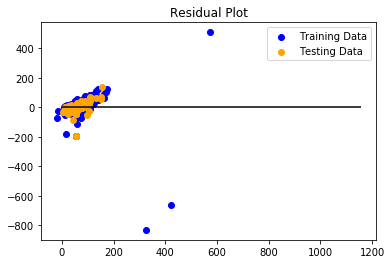

In [95]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [96]:
# Create a Train Test Split
X = drop_df[["abv","id"]]
y = drop_df["srm"].values.reshape(-1, 1)
print(X.shape, y.shape)

(325, 2) (325, 1)


In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,abv,id
220,3.2,221
148,10.5,149
158,17.2,159
224,13.0,225
314,7.2,315


In [98]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.0918627589732246
Testing Score: 0.15820092027932964


Text(0.5, 1.0, 'Residual Plot')

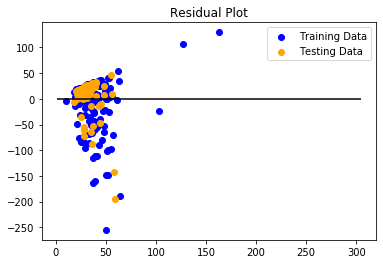

In [99]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [100]:
# Create a Train Test Split
X = drop_df[["abv","id"]]
y = drop_df["attenuation_level"].values.reshape(-1, 1)
print(X.shape, y.shape)

(325, 2) (325, 1)


In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,abv,id
220,3.2,221
148,10.5,149
158,17.2,159
224,13.0,225
314,7.2,315


In [102]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.07832348350257434
Testing Score: 0.17452736307329286


Text(0.5, 1.0, 'Residual Plot')

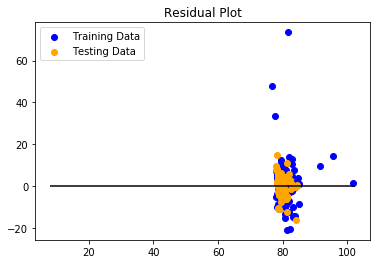

In [103]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [104]:
# Create a Train Test Split
X = drop_df[["ibu","id"]]
y = drop_df["srm"].values.reshape(-1, 1)
print(X.shape, y.shape)

(325, 2) (325, 1)


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,ibu,id
220,8.0,221
148,14.0,149
158,75.0,159
224,100.0,225
314,45.0,315


In [106]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.018851362092446644
Testing Score: -0.03629612097373047


Text(0.5, 1.0, 'Residual Plot')

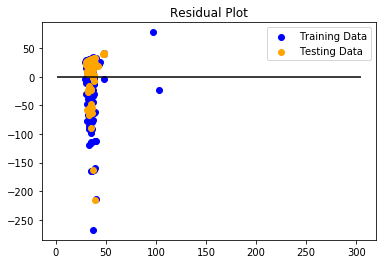

In [107]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [108]:
# Create a Train Test Split
X = drop_df[["ibu","id"]]
y = drop_df["attenuation_level"].values.reshape(-1, 1)
print(X.shape, y.shape)

(325, 2) (325, 1)


In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,ibu,id
220,8.0,221
148,14.0,149
158,75.0,159
224,100.0,225
314,45.0,315


In [110]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.005518796267106385
Testing Score: 0.028673208793532523


Text(0.5, 1.0, 'Residual Plot')

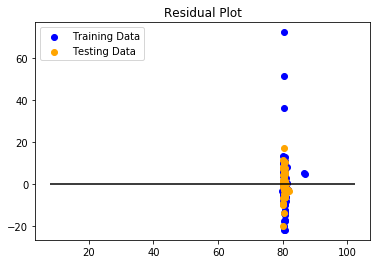

In [111]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION

In [112]:
# Create a Train Test Split
X = drop_df[["srm","id"]]
y = drop_df["attenuation_level"].values.reshape(-1, 1)
print(X.shape, y.shape)

(325, 2) (325, 1)


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train.head()

,srm,id
220,3.000000,221
148,33.581881,149
158,64.000000,159
224,152.000000,225
314,61.000000,315


In [114]:
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)

### END SOLUTION 

print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.006217601868081624
Testing Score: 0.0058945109773440585


Text(0.5, 1.0, 'Residual Plot')

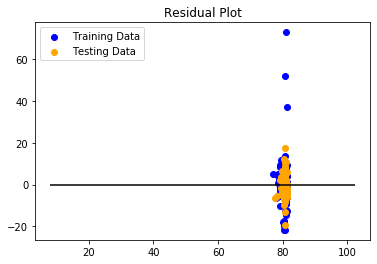

In [115]:
### BEGIN SOLUTION
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")
### END SOLUTION